<a href="https://colab.research.google.com/github/evvvsss/machine_learning_hw/blob/main/hw4_evseeva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Датасет: https://www.kaggle.com/competitions/digit-recognizer/data
Для представленного датасета: необходимо:
1. Решить задачу многоклассовой классификации с помощью многослойной
нейронной сети, состоящей из полносвязных слоев.
2. Вычислить градиент целевой функции по обучаемым параметрам нейронной
сети, сравнить полученные значения со значениями, вычисленными с помощью
библиотечных функций
3. Определить параметры нейронной сети, при которых точность классификации
максимальна

In [148]:
import pandas as pd
import numpy as np

data = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
x = data.drop('label', axis=1)
y = data['label']


In [36]:
data.duplicated().sum()

0

In [150]:
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
data_test = data_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [151]:
display(X_train.shape)
display(X_test.shape)
display(data_test.shape)

(33600, 784)

(8400, 784)

(28000, 784)

In [152]:
X_train = X_train.reshape(33600, 28, 28, 1)
X_test = X_test.reshape(8400, 28, 28, 1)
data_test = data_test.reshape(28000, 28, 28, 1)

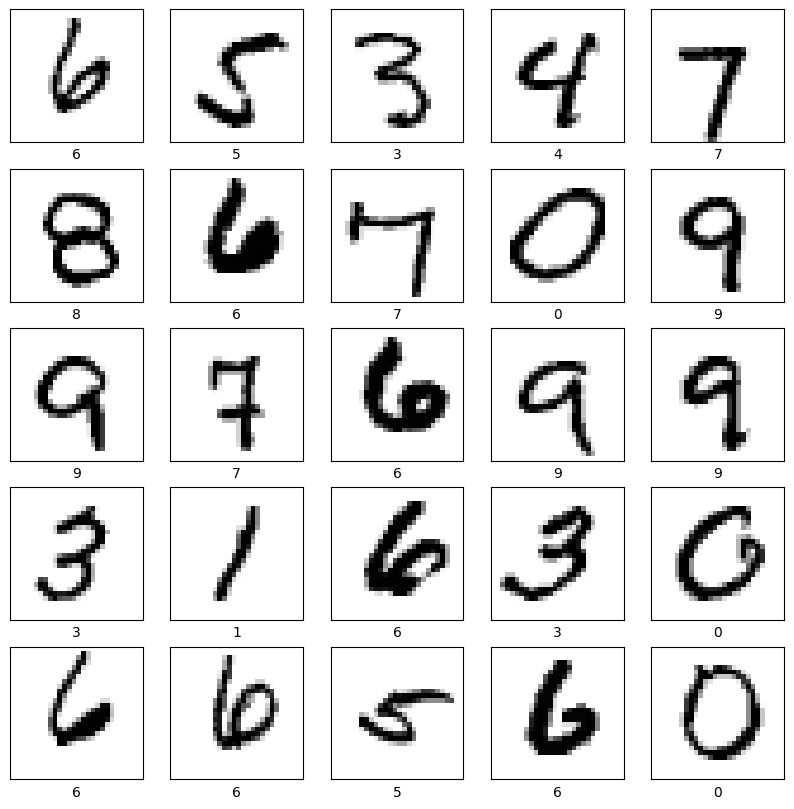

In [153]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [223]:
import random
random_number = random.randint(0, 33600)
x_train_df = data.iloc[:, 1:].values / 256
x_test_df = data.iloc[:, :].values / 256
x_train_df[random_number]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [226]:
y_train_df = data.iloc[:, 0].values
y_train_df[random_number]

4

In [227]:
x_train, x_test, y_train, y_test = train_test_split(x_train_df, y_train_df, test_size=0.2, random_state=42)

In [245]:
earlyStopping = EarlyStopping(monitor='val_loss', patience=20, verbose=0, mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, mode='min')
cnn_model = models.Sequential([
    layers.BatchNormalization(input_shape=(28, 28)),
    layers.Conv1D(128, 8, activation='relu', padding = 'valid'),
    layers.MaxPooling1D(),

    layers.Flatten(),

    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(rate=0.8),

    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(rate=0.6),

    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(rate=0.3),

    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax'),
])

In [246]:
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [247]:
history = cnn_model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=10,
              batch_size=64, validation_data=(x_test.reshape(-1, 28, 28, 1), y_test),
    callbacks=[earlyStopping, reduce_lr_loss])

Epoch 1/10
525/525 [==============================] - 18s 30ms/step - loss: 1.1658 - accuracy: 0.6176 - val_loss: 0.2275 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 2/10
525/525 [==============================] - 15s 29ms/step - loss: 0.4345 - accuracy: 0.8699 - val_loss: 0.1219 - val_accuracy: 0.9632 - lr: 0.0010
Epoch 3/10
525/525 [==============================] - 15s 29ms/step - loss: 0.2995 - accuracy: 0.9151 - val_loss: 0.0898 - val_accuracy: 0.9740 - lr: 0.0010
Epoch 4/10
525/525 [==============================] - 15s 29ms/step - loss: 0.2379 - accuracy: 0.9330 - val_loss: 0.0747 - val_accuracy: 0.9780 - lr: 0.0010
Epoch 5/10
525/525 [==============================] - 15s 29ms/step - loss: 0.2078 - accuracy: 0.9432 - val_loss: 0.0728 - val_accuracy: 0.9787 - lr: 0.0010
Epoch 6/10
525/525 [==============================] - 15s 29ms/step - loss: 0.1863 - accuracy: 0.9496 - val_loss: 0.0725 - val_accuracy: 0.9795 - lr: 0.0010
Epoch 7/10
525/525 [==============================] - 17s 

In [248]:
y_predicted = cnn_model.predict(x_test.reshape(-1, 28, 28, 1))

263/263 [==============================] - 1s 5ms/step


In [249]:
loss, accuracy = cnn_model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)
print(f'Точность: {accuracy}')

263/263 [==============================] - 2s 8ms/step - loss: 0.0647 - accuracy: 0.9830
Точность: 0.9829761981964111


In [250]:
result = [np.argmax(i) for i in y_predicted]
result[:20]


[8, 1, 9, 9, 8, 6, 2, 2, 7, 1, 6, 3, 1, 2, 7, 4, 3, 3, 6, 4]

In [251]:
y_test[:20]

array([8, 1, 9, 9, 8, 6, 2, 2, 7, 1, 6, 3, 1, 2, 7, 4, 3, 3, 6, 4])

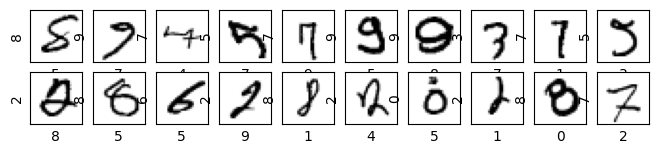

In [253]:
plt.figure(figsize=(8, 8))
count = 0
for i in range(x_test.shape[0]):
    if result[i] != y_test[i]:
        count += 1
        if count > 20:
            break
        plt.subplot(10, 10, count)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
        plt.xlabel(result[i])
        plt.ylabel(y_test[i])
plt.show()

Точность составила 98%. Качество предсказания зависит от количества слоев и batch_size, epochs. Чем больше epochs, тем лучше и чем меньше batch_size (но так довольно долго ждать).